In [1]:
## 국민건강영양통계자료를 바탕으로 PCA 수행

In [2]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

In [3]:
df = pd.read_csv('/Users/sejin/개별연구/2018_2.csv')
df.head()

,sex,age,ho_incm5,edu,wt_hs,wt_itvex,wt_ntr,cfam,genertn,allownc,...,N_K,N_VA,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,HEI
0,1,80,1,3,7129.611906,11065.346820,12602.663140,3,6,0,...,944.539521,157.018937,115.820413,494.382289,74.621889,0.664332,0.509876,4.700086,5.846040,53.215661
1,1,78,5,4,7129.611906,3688.448941,4200.887713,2,2,0,...,3658.637056,274.952137,197.537509,928.975532,120.122882,1.175553,1.217959,16.821098,109.102194,83.316037
2,2,75,5,3,7129.611906,5244.077972,5622.287006,2,2,0,...,3072.114196,948.965037,601.616567,4168.181635,254.268098,0.638100,1.337223,4.785608,96.546711,78.771586
3,2,43,5,4,7129.611906,6814.401521,7251.500000,1,1,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2,80,1,1,7129.611906,5244.077972,5622.287006,2,3,0,...,1244.294594,96.834167,48.430128,580.848469,0.026089,0.877007,0.305087,6.082442,10.749817,51.281633


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7992 entries, 0 to 7991
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         7992 non-null   int64  
 1   age         7992 non-null   int64  
 2   ho_incm5    7992 non-null   int64  
 3   edu         7992 non-null   int64  
 4   wt_hs       7992 non-null   float64
 5   wt_itvex    7992 non-null   float64
 6   wt_ntr      7992 non-null   float64
 7   cfam        7992 non-null   int64  
 8   genertn     7992 non-null   int64  
 9   allownc     7992 non-null   int64  
 10  house       7992 non-null   int64  
 11  live_t      7992 non-null   int64  
 12  ainc_unit1  7992 non-null   int64  
 13  ainc_1      7992 non-null   int64  
 14  DM1_dg      7992 non-null   int64  
 15  DE1_dg      7992 non-null   int64  
 16  DE1_ag      7992 non-null   int64  
 17  DE1_pr      7992 non-null   int64  
 18  educ        7992 non-null   int64  
 19  HE_BMI      7992 non-null  

In [5]:
df.describe()

,sex,age,ho_incm5,edu,wt_hs,wt_itvex,wt_ntr,cfam,genertn,allownc,...,N_K,N_VA,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,HEI
count,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.00000,7992.000000,...,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000
mean,1.544545,43.497122,3.237112,2.593969,5566.529895,6701.670522,7251.528091,3.113363,3.77978,0.104855,...,2280.582878,505.846195,322.935060,2198.332501,139.457445,1.127022,1.348954,10.913094,52.904626,45.362137
std,0.498043,22.576074,1.341915,1.175152,2317.463691,4073.371262,4413.464209,1.250068,1.66348,2.224935,...,1465.623978,547.548918,393.256656,2467.162610,306.535717,0.809828,0.995574,7.930764,71.931615,30.877103
min,1.000000,1.000000,1.000000,1.000000,438.929926,216.900839,222.120199,1.000000,1.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,25.000000,2.000000,1.000000,4308.833069,3916.018186,4252.693994,2.000000,2.00000,0.000000,...,1375.289507,193.252298,120.604047,649.308438,12.344018,0.644954,0.698599,6.008481,15.353500,0.000000
50%,2.000000,46.000000,3.000000,3.000000,5326.170937,5850.946141,6660.523294,3.000000,4.00000,0.000000,...,2175.938034,386.936649,248.704694,1513.129940,74.755427,1.026533,1.228906,9.888965,34.949663,56.399243
75%,2.000000,62.000000,4.000000,4.000000,6657.418583,8349.799263,8771.060506,4.000000,4.00000,0.000000,...,3097.411213,667.112401,418.586066,2937.636657,166.827602,1.497890,1.854311,14.696362,66.995457,69.248574
max,2.000000,80.000000,5.000000,4.000000,12309.602440,34155.500000,45540.666670,6.000000,7.00000,99.000000,...,14856.484240,12431.794740,11561.614500,40411.858100,10691.434250,8.960143,12.884593,108.241999,1569.943014,98.667500


In [6]:
X = df.drop(["DE1_pr", "DE1_dg", "DE1_ag"], axis =1)
y = df.DE1_pr

X_general = X[['sex','age','ho_incm5', 'edu', 'wt_hs','wt_itvex','wt_ntr','cfam',
              'genertn', 'allownc', 'house', 'live_t', 'ainc_unit1', 'ainc_1', 'educ']]
X_HE = X[['HE_BMI', 'HE_HbA1c', 'HE_DM', 'HE_chol', 'HE_Uacid']] # 혈액검사
X_N = X.iloc[:, 22:48] # 식품 섭취 조사

In [7]:
#importing train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X_N))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)

0.9374609130706691


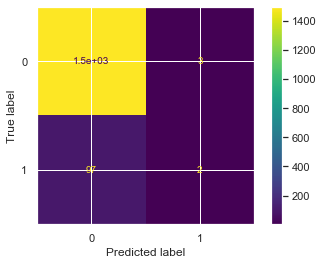

In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(lr, X_test, y_test)

0.9380863039399625


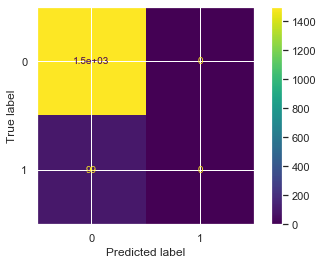

In [10]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=0,
                                    max_features = 'auto', max_depth = 10)

ranfor.fit(X_train, y_train)
pred_ranfor = ranfor.predict(X_test)
print(accuracy_score(y_test, pred_ranfor))
plot_confusion_matrix(ranfor, X_test, y_test)

0.9380863039399625


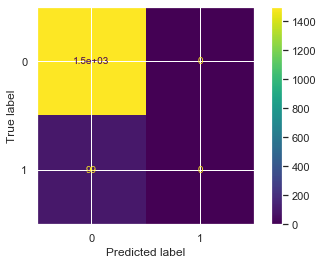

In [11]:
# Support Vector machine

from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, y_train)
pred_svm = sv.predict(X_test)
print(accuracy_score(y_test, pred_svm))
plot_confusion_matrix(sv, X_test, y_test)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(0.8) # 주성분 설명력 80% 이상 되도록
X_reduced = pca.fit_transform(X_scaled)

In [13]:
print('explained variance ratio :', pca.explained_variance_ratio_)

explained variance ratio : [0.60944149 0.08241084 0.0757092  0.03905926]


In [14]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.8) + 1
print('선택할 차원 수 :', d)

선택할 차원 수 : 4


0.9380863039399625


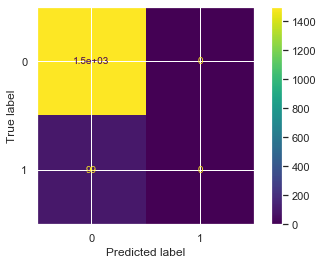

In [15]:
X_train_reduced,X_test_reduced,y_train_reduced,y_test_reduced = train_test_split(X_reduced,y,test_size=0.2,random_state=42)

## PCA 적용 후 - Logistic Regression

lr = LogisticRegression(random_state=0).fit(X_train_reduced, y_train_reduced)
pred_reduced = lr.predict(X_test_reduced)
print(accuracy_score(y_test_reduced, pred_reduced))
plot_confusion_matrix(lr, X_test_reduced, y_test_reduced)

0.9380863039399625


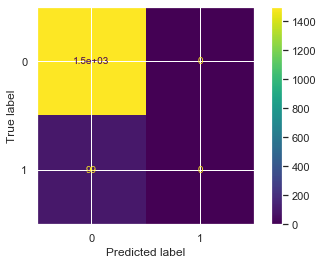

In [16]:
## PCA 적용 후 - Random Forest

ranfor.fit(X_train_reduced, y_train_reduced)
pred_ranfor_reduced = ranfor.predict(X_test_reduced)
print(accuracy_score(y_test_reduced, pred_ranfor_reduced))
plot_confusion_matrix(ranfor, X_test_reduced, y_test_reduced)

0.9380863039399625


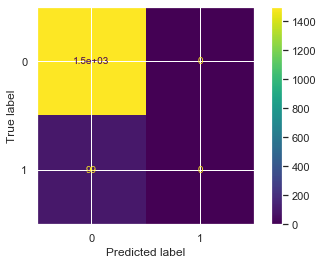

In [17]:
# Support Vector machine

sv.fit(X_train_reduced, y_train_reduced)
pred_svm_reduced = sv.predict(X_test_reduced)
print(accuracy_score(y_test_reduced, pred_svm_reduced))
plot_confusion_matrix(sv, X_test_reduced, y_test_reduced)